In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/cleaned.csv")

In [3]:
data.head()

,Data,Dia da semana,Pontuação,Regularidade,Duração (min),Sono leve (min),%Sono leve,Sono profundo (min),%Sono profundo,REM (min),%REM,Tempo acordado,Vezes acordado
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
2,2025-05-03,sábado,80,90,539,360,66.79,83,15.40,96,17.81,12,4
3,2025-05-04,domingo,77,95,515,338,65.63,72,13.98,105,20.39,29,4
4,2025-05-05,segunda-feira,85,89,428,258,60.28,72,16.82,98,22.90,15,2


In [4]:
y = data["Pontuação"]
X = data.iloc[:, 3:]

In [5]:
X

,Regularidade,Duração (min),Sono leve (min),%Sono leve,Sono profundo (min),%Sono profundo,REM (min),%REM,Tempo acordado,Vezes acordado
0,90,478,337,70.50,39,8.16,102,21.34,6,3
1,90,464,314,67.67,80,17.24,70,15.09,6,1
2,90,539,360,66.79,83,15.40,96,17.81,12,4
3,95,515,338,65.63,72,13.98,105,20.39,29,4
4,89,428,258,60.28,72,16.82,98,22.90,15,2
...,...,...,...,...,...,...,...,...,...,...
68,71,519,338,65.13,63,12.14,118,22.74,8,3
69,75,505,358,70.89,73,14.46,74,14.65,5,3
70,74,472,324,68.64,58,12.29,90,19.07,4,2
71,77,483,309,63.98,76,15.73,98,20.29,9,2


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58, 10), (15, 10), (58,), (15,))

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
model.intercept_

np.float64(-14989.21092476817)

In [11]:
model.coef_

array([ 8.91541706e-02, -1.89524419e-02,  1.58864300e-01,  1.49921055e+02,
        1.01795103e-01,  1.50984789e+02, -2.79611844e-01,  1.52093702e+02,
       -7.93119932e-02, -3.54129863e+00])

In [20]:
y_pred

array([74.8152083 , 76.03550319, 85.54570227, 78.40591166, 81.58596474,
       74.25524901, 79.8633481 , 84.45695689, 67.20937164, 77.92988718,
       84.32225302, 79.33214155, 76.59200553, 84.49543515, 85.9264187 ])

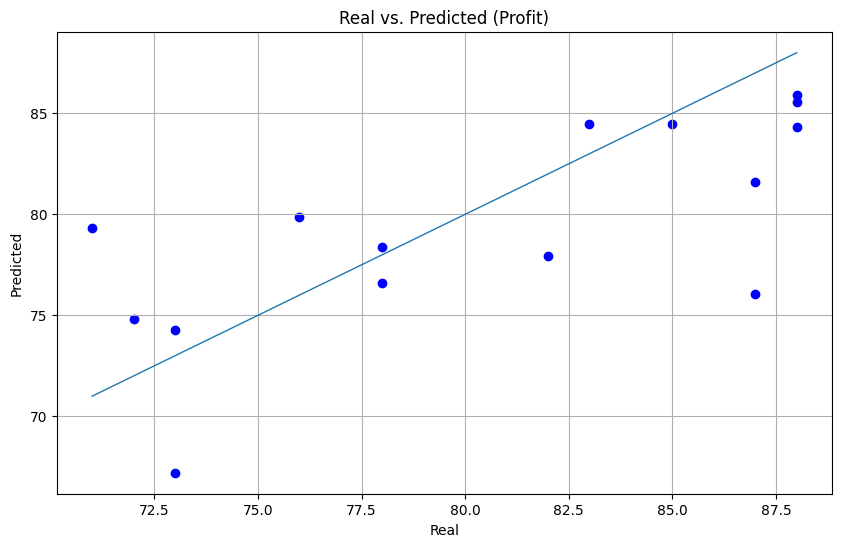

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1) 
plt.grid()
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.title('Real vs. Predicted (Profit)')
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [17]:
mean_absolute_error(y_test, y_pred)

3.6324182724055087

In [18]:
mean_absolute_percentage_error(y_test, y_pred)

0.04544612268150565

In [19]:
mean_squared_error(y_test, y_pred)

21.456927587237114